In [1]:
import os

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import tensorflow as tf
import tensorflow.keras as keras

In [4]:
from scipy import stats

In [5]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Load Data (Original Challenge Data)

In [6]:
data = pd.read_csv('CSV_Files/twitchdata-update.csv')

In [7]:
data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


### Exploratory Data Analysis

#### Check String Values

In [8]:
data['Language'].unique()

array(['English', 'Portuguese', 'Spanish', 'German', 'Korean', 'French',
       'Russian', 'Japanese', 'Chinese', 'Czech', 'Turkish', 'Italian',
       'Polish', 'Thai', 'Arabic', 'Slovak', 'Other', 'Hungarian',
       'Greek', 'Finnish', 'Swedish'], dtype=object)

#### Check Null Values

In [9]:
data.isnull().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

#### Visualization

#### 1. Heatmap

In [10]:
data.columns

Index(['Channel', 'Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers', 'Followers gained',
       'Views gained', 'Partnered', 'Mature', 'Language'],
      dtype='object')

In [11]:
vis_data = data.drop(['Channel', 'Partnered', 'Mature', 'Language'], axis=1)
vis_data.head()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
0,6196161750,215250,222720,27716,3246298,1734810,93036735
1,6091677300,211845,310998,25610,5310163,1370184,89705964
2,5644590915,515280,387315,10976,1767635,1023779,102611607
3,3970318140,517740,300575,7714,3944850,703986,106546942
4,3671000070,123660,285644,29602,8938903,2068424,78998587


In [12]:
vis_corr = vis_data.corr()
vis_corr

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
Watch time(Minutes),1.000000,0.150588,0.582797,0.476165,0.620234,0.514648,0.529862
Stream time(minutes),0.150588,1.000000,-0.119540,-0.249248,-0.091299,-0.158165,0.064370
Peak viewers,0.582797,-0.119540,1.000000,0.682637,0.532529,0.470415,0.298063
Average viewers,0.476165,-0.249248,0.682637,1.000000,0.428303,0.420097,0.250349
Followers,0.620234,-0.091299,0.532529,0.428303,1.000000,0.715618,0.276467
Followers gained,0.514648,-0.158165,0.470415,0.420097,0.715618,1.000000,0.244297
Views gained,0.529862,0.064370,0.298063,0.250349,0.276467,0.244297,1.000000


In [13]:
extracted = pd.DataFrame(vis_corr.loc['Followers gained']).transpose()
extracted

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
Followers gained,0.514648,-0.158165,0.470415,0.420097,0.715618,1.0,0.244297


In [14]:
extracted.to_csv('CSV_Files/extracted_corr.csv', index=False)

<AxesSubplot:>

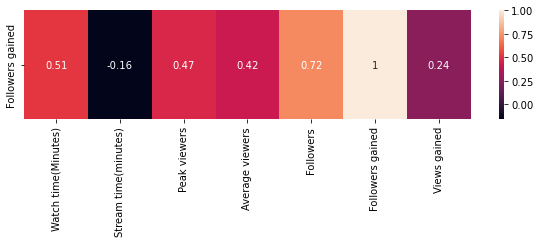

In [14]:
figure, ax = plt.subplots(figsize=(10,2))
figure.set_facecolor('white')
sns.heatmap(ax=ax, data=extracted, annot=True)

**EDA Evaluation 1**
<br>The number of *Followers gained* have the highest correlation with the number of *Followers*, followed by the amount of *Watch time(Minutes)*. While, *Stream time(minutes)* is negatively correlated.

#### 2. Countplot

<AxesSubplot:xlabel='Partnered', ylabel='count'>

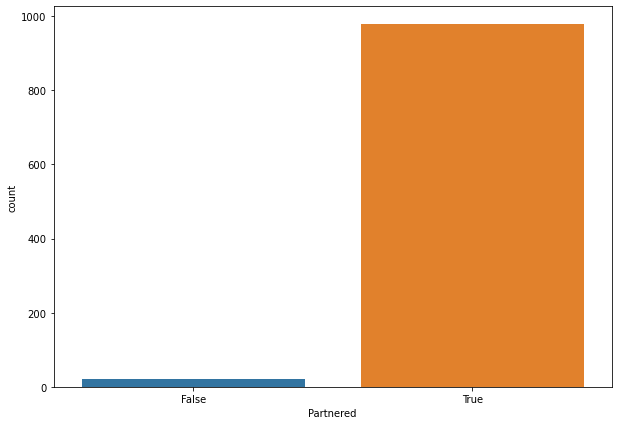

In [15]:
figure, ax = plt.subplots(figsize=(10,7))
figure.set_facecolor('white')
sns.countplot(ax=ax, x=data['Partnered'])

In [16]:
partnered_true = len(data[data['Partnered']==True]['Partnered'])
partnered_false = len(data[data['Partnered']==False]['Partnered'])

partnered_percentage = (partnered_true / (partnered_true + partnered_false)) * 100

print(f"Partnered: {partnered_true}")
print(f"Partnered: {partnered_false}")
print(f"Partnered percentage: {partnered_percentage}")

Partnered: 978
Partnered: 22
Partnered percentage: 97.8


<AxesSubplot:xlabel='Mature', ylabel='count'>

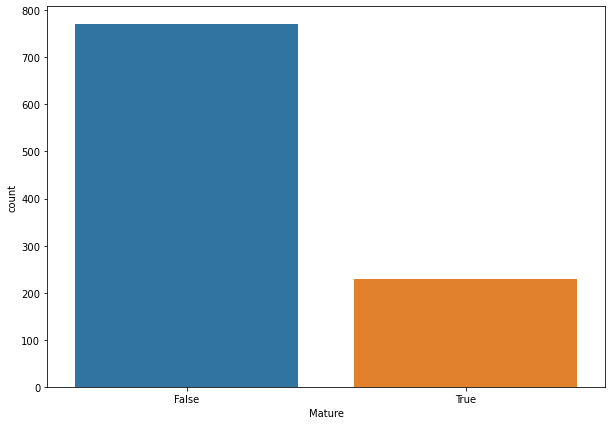

In [17]:
figure, ax = plt.subplots(figsize=(10,7))
figure.set_facecolor('white')
sns.countplot(ax=ax, x=data['Mature'])

In [18]:
mature_true = len(data[data['Mature']==True]['Mature'])
mature_false = len(data[data['Mature']==False]['Mature'])

mature_percentage = (mature_true / (mature_true + mature_false)) * 100

print(f"Mature: {mature_true}")
print(f"Mature: {mature_false}")
print(f"Mature percentage: {mature_percentage}")

Mature: 230
Mature: 770
Mature percentage: 23.0


<AxesSubplot:xlabel='Language', ylabel='count'>

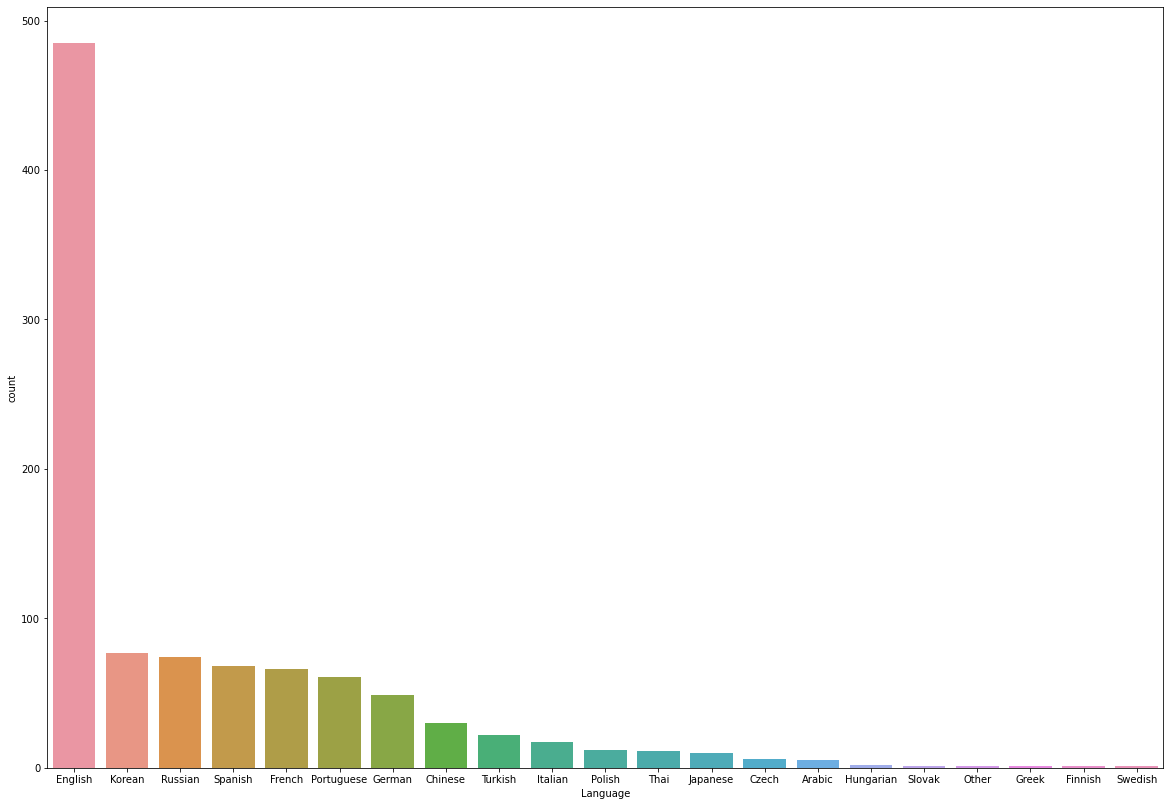

In [19]:
figure, ax = plt.subplots(figsize=(20,14))
figure.set_facecolor('white')
sns.countplot(ax=ax, x='Language', data=data, order=data['Language'].value_counts().index)

In [21]:
english = len(data[data['Language']=='English']['Language'])
korean = len(data[data['Language']=='Korean']['Language'])
russian = len(data[data['Language']=='Russian']['Language'])
others = 1000-(english + korean + russian)

english_percentage = round((english / 1000) * 100, 1)
korean_percentage = round((korean / 1000) * 100, 1)
russian_percentage = round((russian / 1000) * 100, 1)
others_percentage = round((others / 1000) * 100, 1)

print(f"English percentage: {english_percentage}")
print(f"Korean percentage: {korean_percentage}")
print(f"Russian percentage: {russian_percentage}")
print(f"Others: {others_percentage}")

English percentage: 48.5
Korean percentage: 7.7
Russian percentage: 7.4
Others: 36.4


**EDA Evaluation 2**
<br>97.8 percent of the streamers are *Partnered*;
<br>23 percent of the streamers are *Mature*;
<br>The top 3 languages used by streamers are English(48.5 percent), Korean(7.7 percent), and Russian(7.4 percent), respectively.

### Load Data (Modified Challenge Data)

In [6]:
train_data = pd.read_csv('Data_Files/train.csv')
test_data = pd.read_csv('Data_Files/test.csv')

In [7]:
train_data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,2ZR62O53,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,English
1,ZJ31SS7Q,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,English
2,I31VI9RK,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,Portuguese
3,6GP9WLYR,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,English
4,3DVR0TDD,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,English


In [8]:
test_data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Views gained,Partnered,Mature,Language
0,97R8L3J0,154332060,27105,29983,5864,308815,8255635,0,0,Russian
1,6UV44QFF,154277370,87375,9437,1759,151886,3019137,1,1,French
2,2WKQZUGR,154125945,77475,9460,2106,411346,4832180,1,0,Turkish
3,R4DGVX2D,153988380,83325,11200,1787,272635,4345590,1,0,French
4,P8YSNIOI,153963765,110910,14329,1281,106365,1449834,1,1,English


In [9]:
train_data.drop('Language', axis=1, inplace=True)

In [10]:
train_data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature
0,2ZR62O53,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0
1,ZJ31SS7Q,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0
2,I31VI9RK,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1
3,6GP9WLYR,3970318140,517740,300575,7714,3944850,703986,106546942,1,0
4,3DVR0TDD,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0


In [11]:
len(train_data.columns)

10

In [12]:
test_data.drop('Language', axis=1, inplace=True)

In [13]:
test_data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Views gained,Partnered,Mature
0,97R8L3J0,154332060,27105,29983,5864,308815,8255635,0,0
1,6UV44QFF,154277370,87375,9437,1759,151886,3019137,1,1
2,2WKQZUGR,154125945,77475,9460,2106,411346,4832180,1,0
3,R4DGVX2D,153988380,83325,11200,1787,272635,4345590,1,0
4,P8YSNIOI,153963765,110910,14329,1281,106365,1449834,1,1


In [14]:
len(test_data.columns)

9

In [15]:
test_channels = pd.DataFrame(test_data['Channel'])

In [16]:
test_channels.head()

,Channel
0,97R8L3J0
1,6UV44QFF
2,2WKQZUGR
3,R4DGVX2D
4,P8YSNIOI


In [17]:
train_data.drop('Channel', axis=1, inplace=True)
test_data.drop('Channel', axis=1, inplace=True)

In [18]:
train_data.head()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature
0,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0
1,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0
2,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1
3,3970318140,517740,300575,7714,3944850,703986,106546942,1,0
4,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0


In [19]:
test_data.head()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Views gained,Partnered,Mature
0,154332060,27105,29983,5864,308815,8255635,0,0
1,154277370,87375,9437,1759,151886,3019137,1,1
2,154125945,77475,9460,2106,411346,4832180,1,0
3,153988380,83325,11200,1787,272635,4345590,1,0
4,153963765,110910,14329,1281,106365,1449834,1,1


In [20]:
train_data.to_csv('Data_Files/Processed/processed_train_data.csv', index=False)
test_data.to_csv('Data_Files/Processed/processed_test_data.csv', index=False)

### Train Test Split

In [21]:
X_train = train_data.drop('Followers gained', axis=1).values
y_train = train_data['Followers gained'].values
X_test = test_data.values

### Data Preprocessing & Model Generation

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras.backend as K
from keras.losses import mean_squared_error as mse

In [26]:
model = Sequential()

# INPUT LAYER
model.add(Dense(512, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.1))

# FIRST DENSE LAYER
model.add(Dense(256, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.1))

# SECOND DENSE LAYER
model.add(Dense(128, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.1))

# THIRD DENSE LAYER
model.add(Dense(64, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.1))

# OUTPUT LAYER
model.add(Dense(1))

# COMPILE MODEL
def rmse(y_true, y_pred):
    return K.sqrt(mse(y_true, y_pred))

model.compile(optimizer='adam', loss=rmse)

### Model Training

In [27]:
model.fit(X_train, y_train, batch_size=32, epochs=300)

Epoch 1/300
25/25 [==============================] - 1s 4ms/step - loss: 229978.2969
Epoch 2/300
25/25 [==============================] - 0s 4ms/step - loss: 229768.2969
Epoch 3/300
25/25 [==============================] - 0s 4ms/step - loss: 226481.1562
Epoch 4/300
25/25 [==============================] - 0s 4ms/step - loss: 206531.7344
Epoch 5/300
25/25 [==============================] - 0s 4ms/step - loss: 179429.7969
Epoch 6/300
25/25 [==============================] - 0s 4ms/step - loss: 174724.2969
Epoch 7/300
25/25 [==============================] - 0s 4ms/step - loss: 172305.3125
Epoch 8/300
25/25 [==============================] - 0s 4ms/step - loss: 170841.5938
Epoch 9/300
25/25 [==============================] - 0s 4ms/step - loss: 170634.3594
Epoch 10/300
25/25 [==============================] - 0s 4ms/step - loss: 167836.1250
Epoch 11/300
25/25 [==============================] - 0s 4ms/step - loss: 165943.1875
Epoch 12/300
25/25 [==============================] - 0s 4ms/st

25/25 [==============================] - 0s 3ms/step - loss: 124700.9609
Epoch 97/300
25/25 [==============================] - 0s 3ms/step - loss: 122796.2969
Epoch 98/300
25/25 [==============================] - 0s 5ms/step - loss: 124100.6484
Epoch 99/300
25/25 [==============================] - 0s 4ms/step - loss: 122560.0625
Epoch 100/300
25/25 [==============================] - 0s 3ms/step - loss: 122893.6562
Epoch 101/300
25/25 [==============================] - 0s 3ms/step - loss: 123743.4062
Epoch 102/300
25/25 [==============================] - 0s 3ms/step - loss: 124566.2266
Epoch 103/300
25/25 [==============================] - 0s 3ms/step - loss: 121098.4531
Epoch 104/300
25/25 [==============================] - 0s 3ms/step - loss: 121634.2500
Epoch 105/300
25/25 [==============================] - 0s 3ms/step - loss: 122704.7969
Epoch 106/300
25/25 [==============================] - 0s 4ms/step - loss: 123548.1172
Epoch 107/300
25/25 [==============================] - 0s 5m

25/25 [==============================] - 0s 3ms/step - loss: 121560.7812
Epoch 191/300
25/25 [==============================] - 0s 3ms/step - loss: 121618.4297
Epoch 192/300
25/25 [==============================] - 0s 3ms/step - loss: 120852.5078
Epoch 193/300
25/25 [==============================] - 0s 3ms/step - loss: 121400.7422
Epoch 194/300
25/25 [==============================] - 0s 3ms/step - loss: 122856.1172
Epoch 195/300
25/25 [==============================] - 0s 3ms/step - loss: 122098.1797
Epoch 196/300
25/25 [==============================] - 0s 3ms/step - loss: 122168.8281
Epoch 197/300
25/25 [==============================] - 0s 3ms/step - loss: 121741.3438
Epoch 198/300
25/25 [==============================] - 0s 3ms/step - loss: 121686.2891
Epoch 199/300
25/25 [==============================] - 0s 3ms/step - loss: 120099.6562
Epoch 200/300
25/25 [==============================] - 0s 3ms/step - loss: 120910.8203
Epoch 201/300
25/25 [==============================] - 0s

25/25 [==============================] - 0s 3ms/step - loss: 121490.1406
Epoch 285/300
25/25 [==============================] - 0s 3ms/step - loss: 120281.0000
Epoch 286/300
25/25 [==============================] - 0s 3ms/step - loss: 121869.5703
Epoch 287/300
25/25 [==============================] - 0s 3ms/step - loss: 121434.3984
Epoch 288/300
25/25 [==============================] - 0s 3ms/step - loss: 121781.8594
Epoch 289/300
25/25 [==============================] - 0s 3ms/step - loss: 120828.3438
Epoch 290/300
25/25 [==============================] - 0s 3ms/step - loss: 121099.0625
Epoch 291/300
25/25 [==============================] - 0s 3ms/step - loss: 121347.0312
Epoch 292/300
25/25 [==============================] - 0s 3ms/step - loss: 120090.9219
Epoch 293/300
25/25 [==============================] - 0s 3ms/step - loss: 121901.9062
Epoch 294/300
25/25 [==============================] - 0s 3ms/step - loss: 121844.0781
Epoch 295/300
25/25 [==============================] - 0s

### Model Predictions

In [28]:
dnn_pred = model.predict(X_test)

### Output Predictions

In [29]:
dnn_pred

array([[ 755425.06 ],
       [ 480246.7  ],
       [ 773048.1  ],
       [ 609017.3  ],
       [ 399537.97 ],
       [ 642469.8  ],
       [ 454214.53 ],
       [ 499299.12 ],
       [ 354157.75 ],
       [ 630714.94 ],
       [ 931085.5  ],
       [ 500359.6  ],
       [ 789789.94 ],
       [ 323575.47 ],
       [ 485515.7  ],
       [ 371341.62 ],
       [1365360.6  ],
       [ 327547.03 ],
       [ 338909.97 ],
       [ 489538.03 ],
       [ 683775.56 ],
       [1314054.1  ],
       [ 397591.78 ],
       [ 483323.16 ],
       [ 372561.25 ],
       [1079631.8  ],
       [1054817.1  ],
       [ 337545.3  ],
       [ 149699.58 ],
       [ 284075.97 ],
       [ 859982.56 ],
       [ 478255.25 ],
       [ 726359.25 ],
       [ 293793.78 ],
       [ 404286.5  ],
       [ 278921.25 ],
       [ 299858.84 ],
       [ 232969.08 ],
       [ 394533.75 ],
       [ 526555.7  ],
       [ 401525.25 ],
       [1126689.9  ],
       [ 721208.06 ],
       [ 314788.72 ],
       [ 471003.53 ],
       [ 2

In [30]:
predictions = pd.DataFrame(dnn_pred)
predictions.head()

,0
0,755425.06250
1,480246.68750
2,773048.12500
3,609017.31250
4,399537.96875


In [31]:
predictions.rename(columns={0: 'Followers gained'}, inplace=True)
predictions.head()

,Followers gained
0,755425.06250
1,480246.68750
2,773048.12500
3,609017.31250
4,399537.96875


In [32]:
prediction_values = predictions['Followers gained'].values.astype(int)

In [33]:
prediction_values

array([ 755425,  480246,  773048,  609017,  399537,  642469,  454214,
        499299,  354157,  630714,  931085,  500359,  789789,  323575,
        485515,  371341, 1365360,  327547,  338909,  489538,  683775,
       1314054,  397591,  483323,  372561, 1079631, 1054817,  337545,
        149699,  284075,  859982,  478255,  726359,  293793,  404286,
        278921,  299858,  232969,  394533,  526555,  401525, 1126689,
        721208,  314788,  471003,  250484,  366322,  313154,  674902,
        321990, 1130509,  303428,  607455, 1255260,  299091,  486329,
        405625,  365859,  885308,  806601,  738048,  435762,  275345,
        299932,  907900,  255360,  892506,  664816,  293944,  447815,
        318566,  428470,  259180,  764788,  580241,  236688,  371870,
        254893,  495202,  811958,  709597,  218575,  366831,  321568,
        329634,  744863,  210648,  668927,  229235,  509233,  106912,
        297747,  393758,  286975,  231147,  336921,  491812,  336658,
        429942,  294

In [34]:
predictions['Followers gained'] = prediction_values

In [35]:
predictions.head()

,Followers gained
0,755425
1,480246
2,773048
3,609017
4,399537


In [36]:
predictions = pd.concat([test_channels, predictions], axis=1)
predictions.head()

,Channel,Followers gained
0,97R8L3J0,755425
1,6UV44QFF,480246
2,2WKQZUGR,773048
3,R4DGVX2D,609017
4,P8YSNIOI,399537


In [37]:
len(predictions)

200

In [38]:
predictions.to_csv('Predictions_200.csv', index=False)